In [1515]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import datetime
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import scipy.stats as stats

In [1516]:
df=pd.read_csv('/content/customerseg.csv', sep='\t')

#Preprocessing

In [1517]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [1518]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [1519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1520]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [1521]:
df.dropna(inplace= True)

In [1522]:
df.count()

ID                     2216
Year_Birth             2216
Education              2216
Marital_Status         2216
Income                 2216
Kidhome                2216
Teenhome               2216
Dt_Customer            2216
Recency                2216
MntWines               2216
MntFruits              2216
MntMeatProducts        2216
MntFishProducts        2216
MntSweetProducts       2216
MntGoldProds           2216
NumDealsPurchases      2216
NumWebPurchases        2216
NumCatalogPurchases    2216
NumStorePurchases      2216
NumWebVisitsMonth      2216
AcceptedCmp3           2216
AcceptedCmp4           2216
AcceptedCmp5           2216
AcceptedCmp1           2216
AcceptedCmp2           2216
Complain               2216
Z_CostContact          2216
Z_Revenue              2216
Response               2216
dtype: int64

In [1523]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [1524]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [1525]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1526]:
value_counts = df["Marital_Status"].value_counts()
print(value_counts)

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [1527]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [1528]:
value_count = df["Education"].value_counts()
print(value_count)

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


#Feature Engineering

In [1529]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [1530]:
df['Spent'] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Children"]=df["Kidhome"]+df["Teenhome"]
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [1531]:
df=df.drop(['Marital_Status'],axis=1)

In [1532]:
df = pd.get_dummies(df, columns=['Living_With','Education'])

In [1533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2216 non-null   int64         
 1   Year_Birth               2216 non-null   int64         
 2   Income                   2216 non-null   float64       
 3   Kidhome                  2216 non-null   int64         
 4   Teenhome                 2216 non-null   int64         
 5   Dt_Customer              2216 non-null   datetime64[ns]
 6   Recency                  2216 non-null   int64         
 7   MntWines                 2216 non-null   int64         
 8   MntFruits                2216 non-null   int64         
 9   MntMeatProducts          2216 non-null   int64         
 10  MntFishProducts          2216 non-null   int64         
 11  MntSweetProducts         2216 non-null   int64         
 12  MntGoldProds             2216 non-

#Checking variance and correlations in data

In [1534]:
variance = np.var(df)
print(variance)

ID                         1.055368e+07
Year_Birth                 1.435887e+02
Income                     6.333978e+08
Kidhome                    2.881275e-01
Teenhome                   2.959996e-01
Recency                    8.376289e+02
MntWines                   1.137388e+05
MntFruits                  1.582841e+03
MntMeatProducts            5.028029e+04
MntFishProducts            2.996438e+03
MntSweetProducts           1.686152e+03
MntGoldProds               2.683626e+03
NumDealsPurchases          3.699012e+00
NumWebPurchases            7.509423e+00
NumCatalogPurchases        8.561904e+00
NumStorePurchases          1.056283e+01
NumWebVisitsMonth          5.879710e+00
AcceptedCmp3               6.814548e-02
AcceptedCmp4               6.853015e-02
AcceptedCmp5               6.776040e-02
AcceptedCmp1               5.997325e-02
AcceptedCmp2               1.335463e-02
Complain                   9.386730e-03
Z_CostContact              0.000000e+00
Z_Revenue                  0.000000e+00


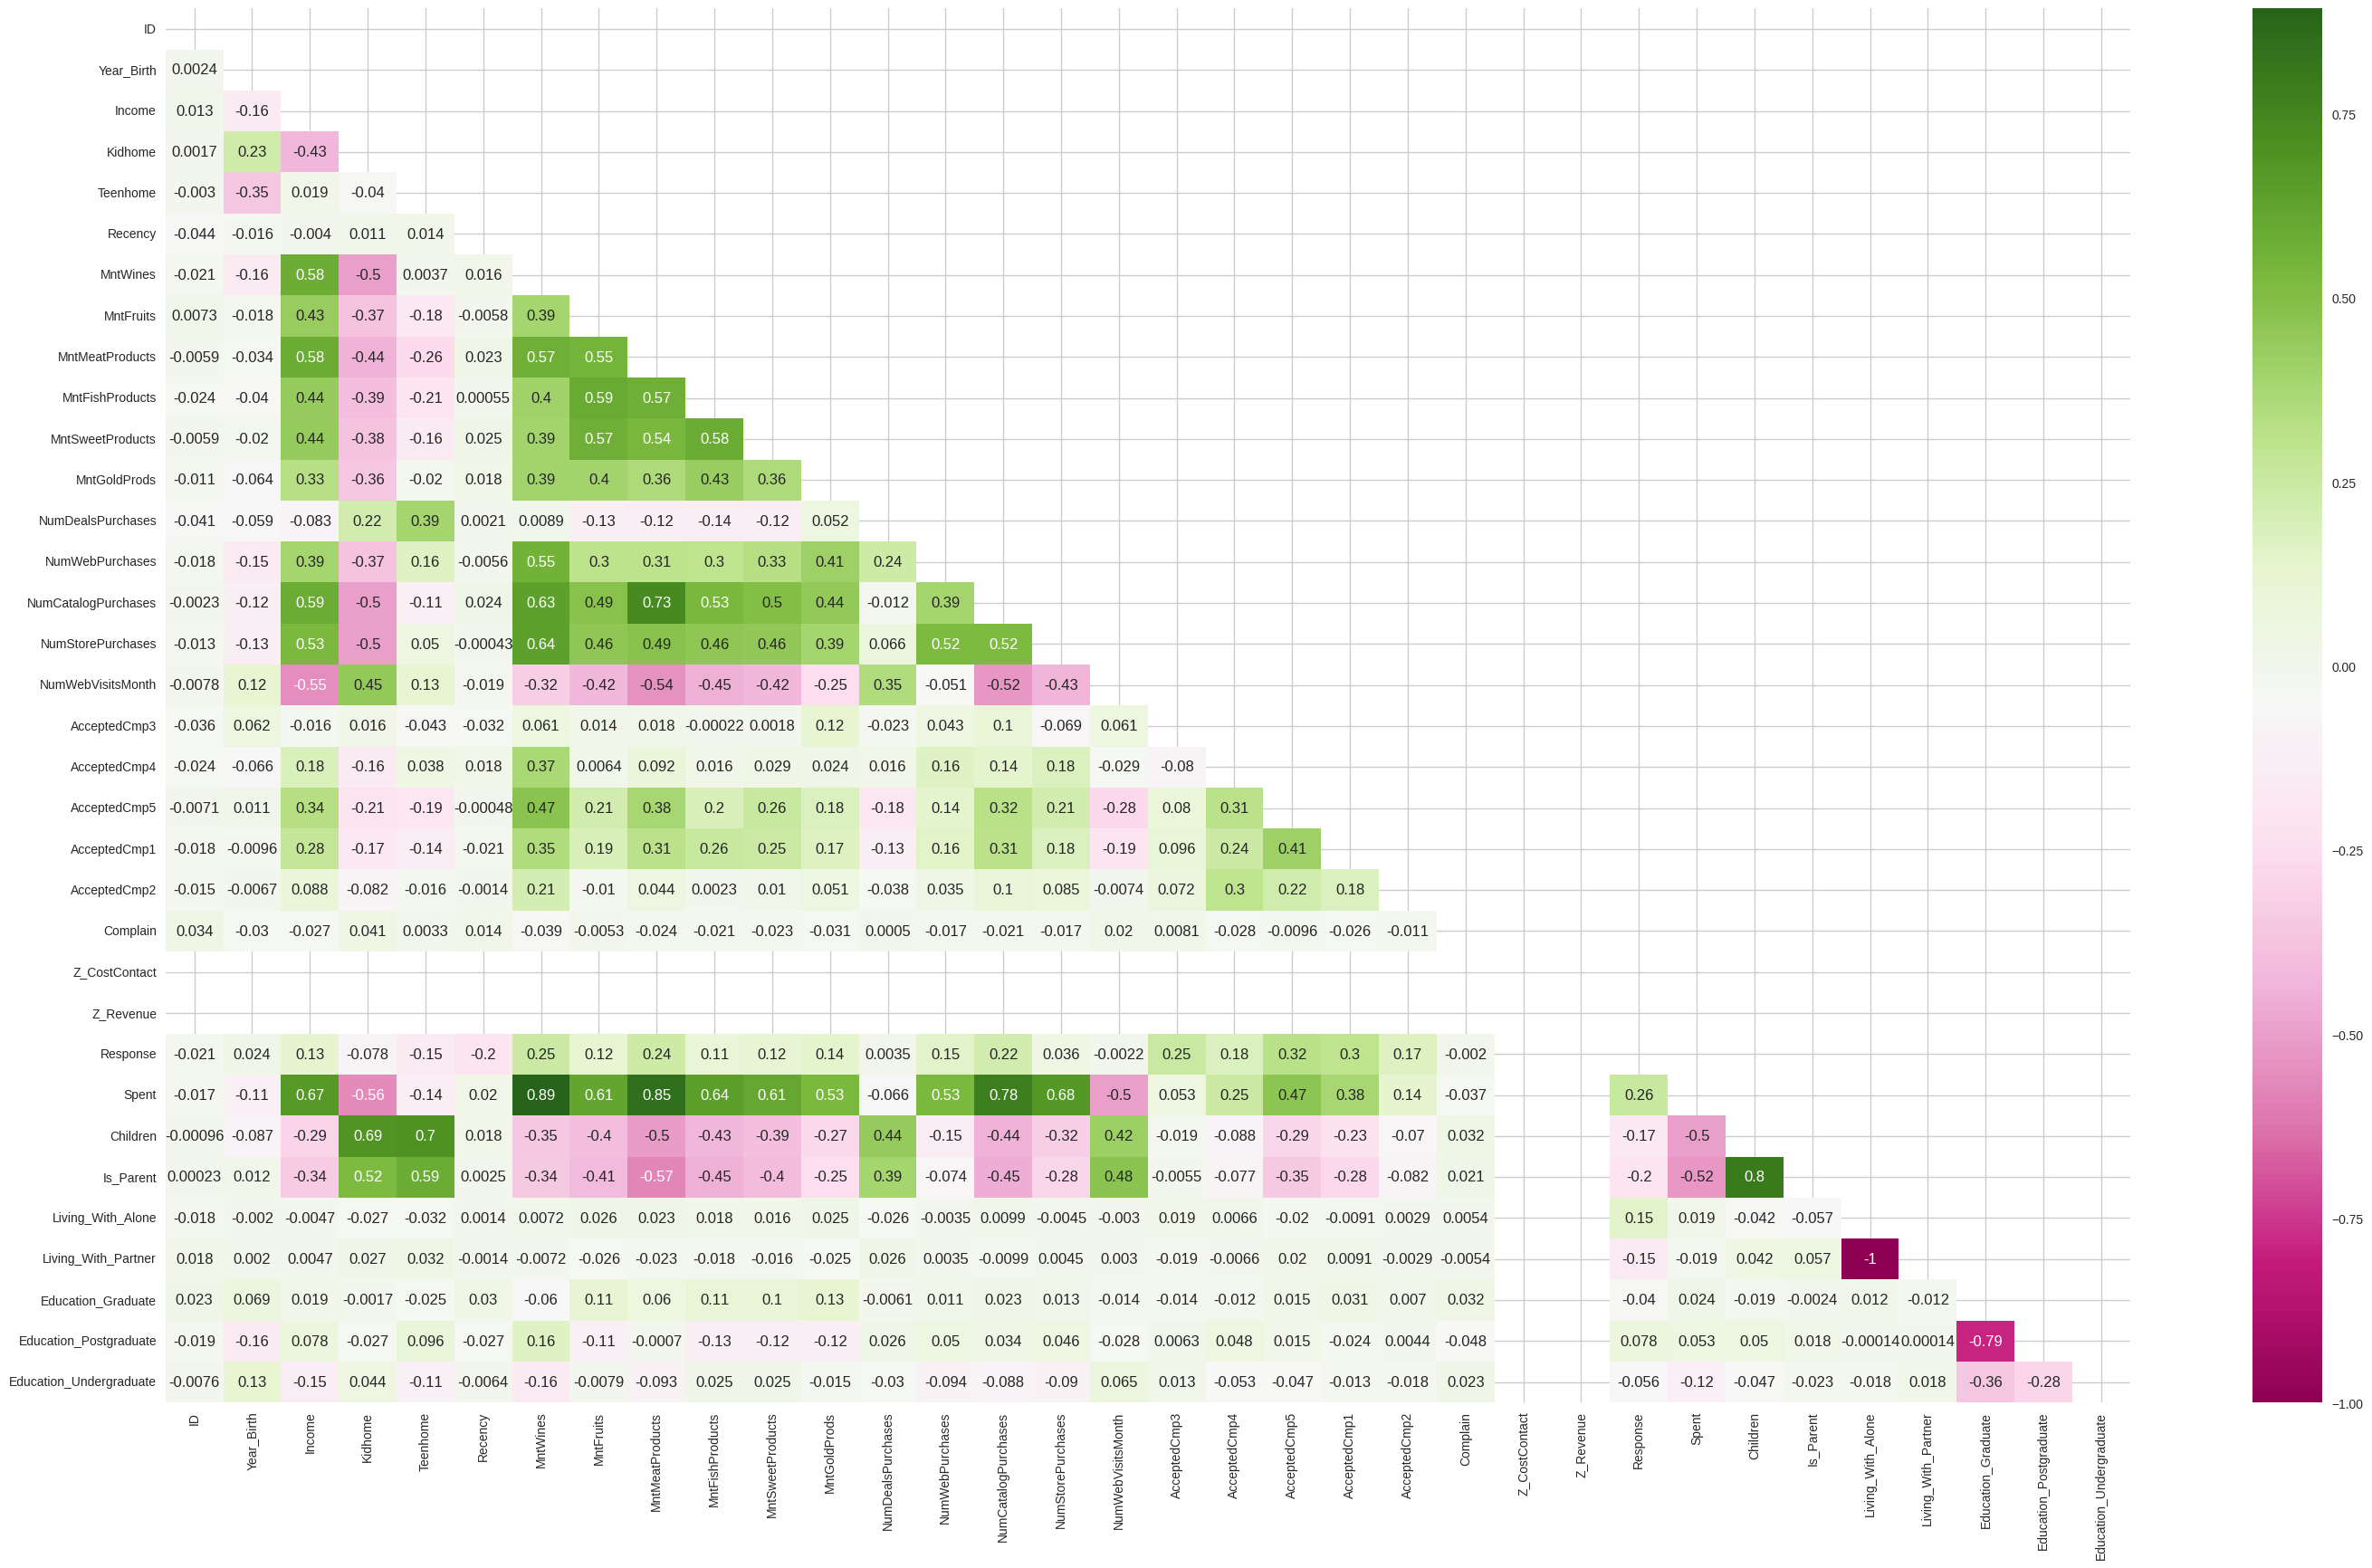

In [1535]:
corr_matrix = df.corr()
plt.figure(figsize=(35,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap="PiYG", annot=True)
plt.show()

In [1538]:
Columns_delete = ['ID','Year_Birth','Z_CostContact','Z_Revenue', 'Complain', 'Response','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df = df.drop(Columns_delete, axis=1)

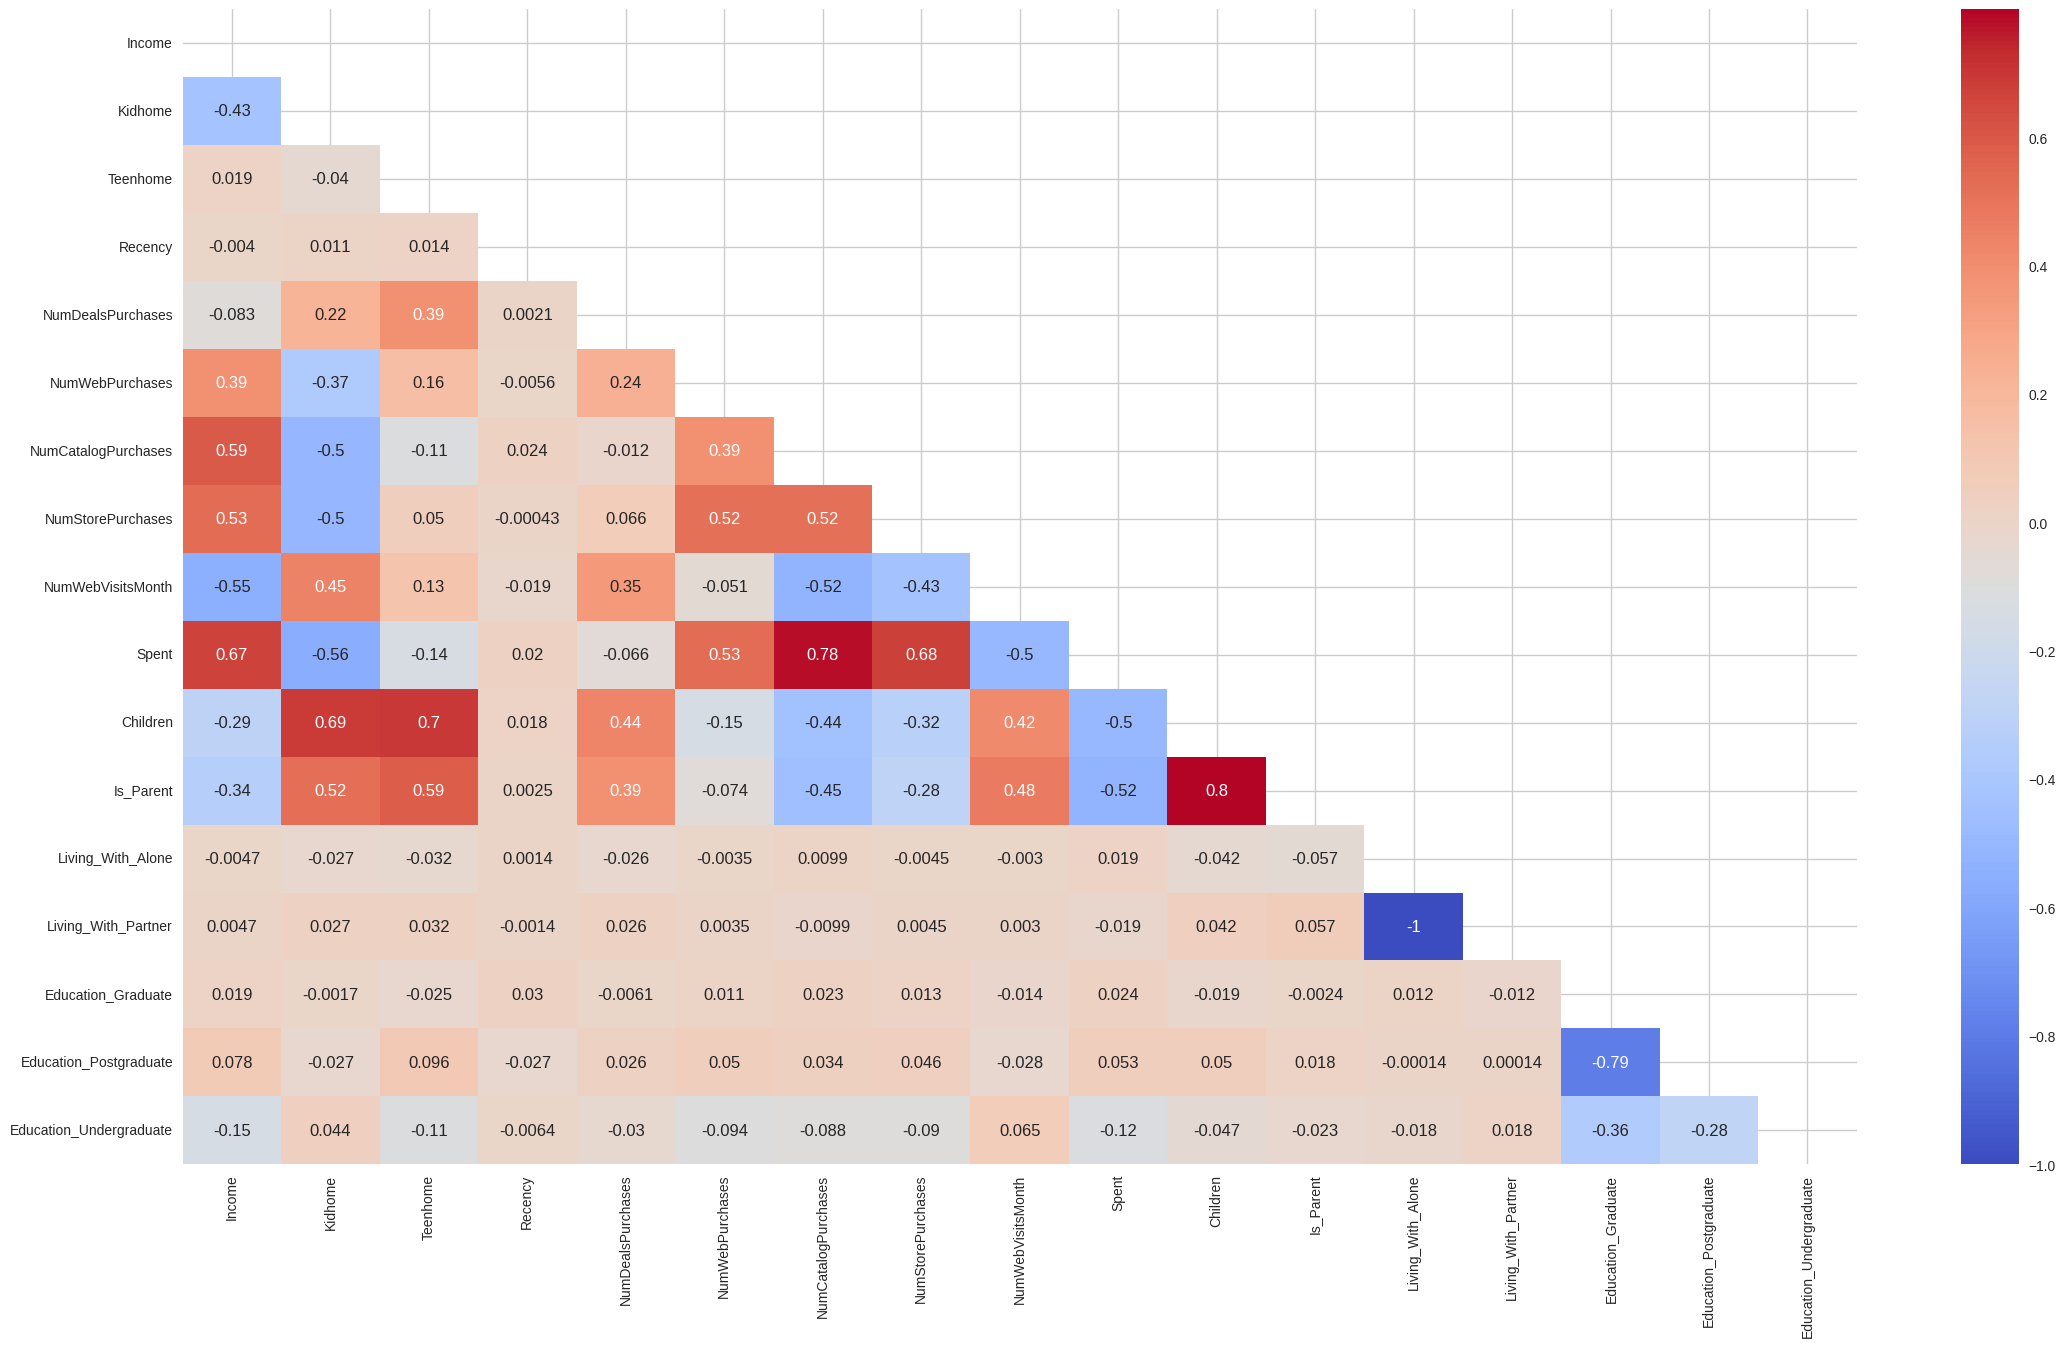

In [1539]:
corr_matrix2 = df.corr()
plt.figure(figsize=(27,15))
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))
sns.heatmap(corr_matrix2, mask=mask, cmap="coolwarm", annot=True)
plt.show()

In [1540]:
x=df.columns.values

In [1541]:
scaler = StandardScaler()
model= df.drop(['Dt_Customer'], axis=1)
scaled= scaler.fit(model)
df = scaled.transform(model)

In [1542]:
df = pd.DataFrame(df)

In [1543]:
for i in range(len(x)):
    df = df.rename({i:x[i]}, axis=1)

In [1544]:
df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Children,Is_Parent,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate
0,0.234063,-0.823039,-0.928972,0.310532,0.351713,1.428553,2.504712,-0.554143,0.693232,1.675488,-1.264803,-1.581389,1.348829,-1.348829,0.992806,-0.785823,-0.359805
1,-0.234559,1.039938,0.909066,-0.380509,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.962358,1.405806,0.632356,1.348829,-1.348829,0.992806,-0.785823,-0.359805
2,0.769478,-0.823039,-0.928972,-0.795134,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.280250,-1.264803,-1.581389,-0.741384,0.741384,0.992806,-0.785823,-0.359805
3,-1.017239,1.039938,-0.928972,-0.795134,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.919224,0.070501,0.632356,-0.741384,0.741384,0.992806,-0.785823,-0.359805
4,0.240221,1.039938,-0.928972,1.554407,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.307044,0.070501,0.632356,-0.741384,0.741384,-1.007246,1.272551,-0.359805


In [1545]:
df_copy=df

In [1546]:
pca_try = PCA(n_components=10)
pca_fit = pca_try.fit(df_copy)

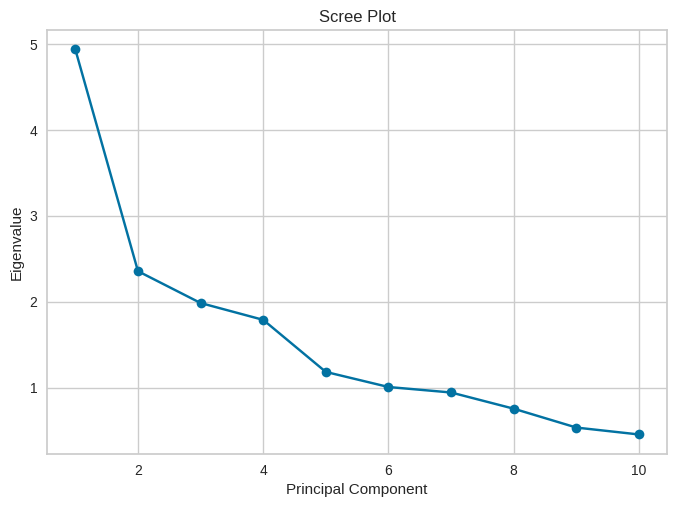

In [1547]:
eigenvalues = pca_try.explained_variance_
plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [1548]:
pca = PCA(n_components=2)
pca_fit = pca.fit(df_final)

In [1549]:
PCA_data = pd.DataFrame(pca.transform(df), columns=(["column 1","column 2"]))
PCA_data.describe()

,column 1,column 2
count,2.216000e+03,2.216000e+03
mean,-1.987981e-16,-6.412841e-17
std,2.062782e+00,1.502366e+00
min,-6.263772e+00,-4.007907e+00
25%,-1.770376e+00,-1.089622e+00
50%,-2.306072e-01,-1.473888e-01
75%,1.448036e+00,1.082201e+00
max,6.719462e+00,5.728351e+00


In [1550]:
x =PCA_data["column 1"]
y =PCA_data["column 2"]

In [1551]:
transformed_df = pca.transform(df)
if transformed_df.shape == (df.shape[0], 2):
    print("Transformed data has the correct shape")
else:
    print("Transformed data does not have the correct shape")

Transformed data has the correct shape


#Clustering

Elbow Method to determine the number of clusters to be formed:


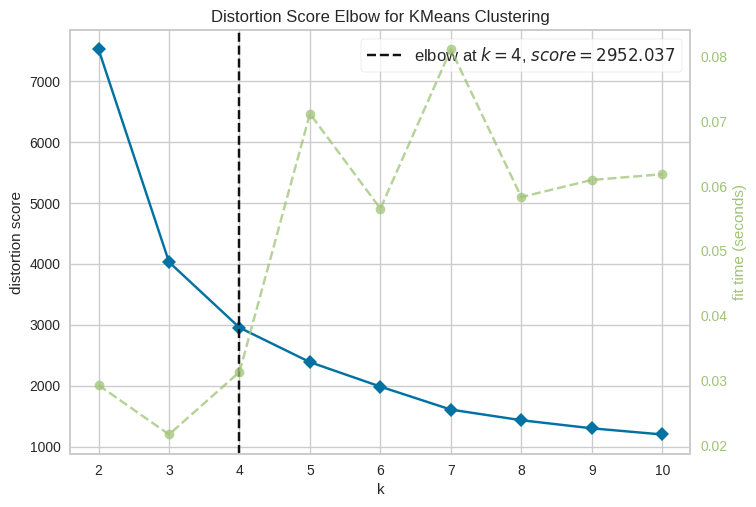

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1552]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_data)
Elbow_M.show()

In [1553]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=None)
model=kmeans.fit_predict(PCA_data)
kmeans.labels_

array([3, 1, 3, ..., 3, 2, 0], dtype=int32)

In [1554]:
PCA_data["Clusters"] = model
df['Clusters']= model

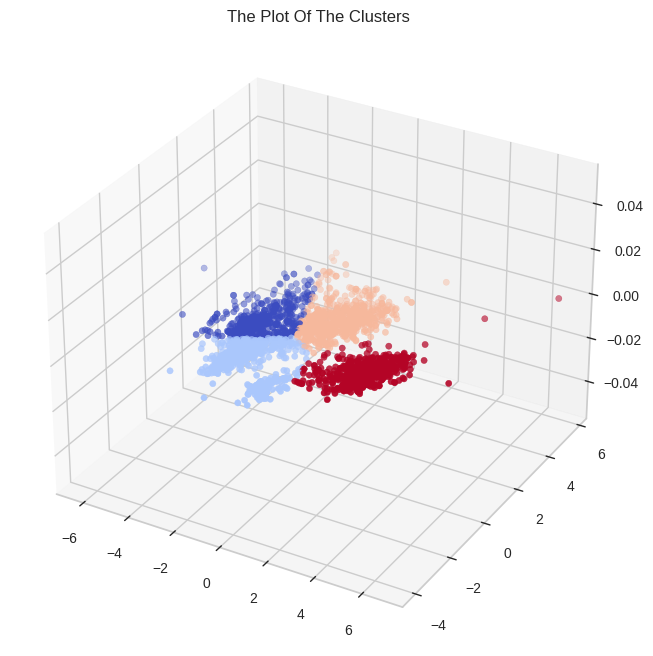

In [1555]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, c=PCA_data["Clusters"], marker='o',cmap='coolwarm')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [1556]:
AC = AgglomerativeClustering(n_clusters=4)
model2= AC.fit_predict(PCA_data)

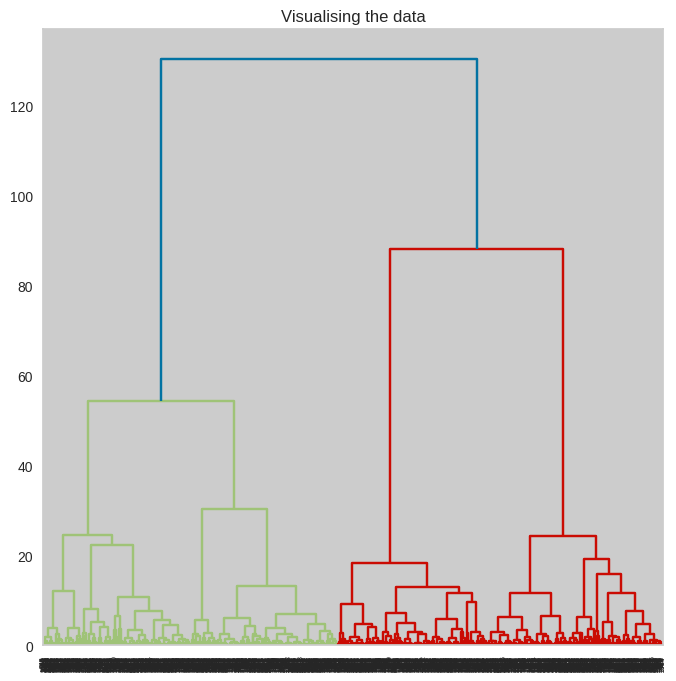

In [1557]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(PCA_data, method ='ward')))

#Visualizations

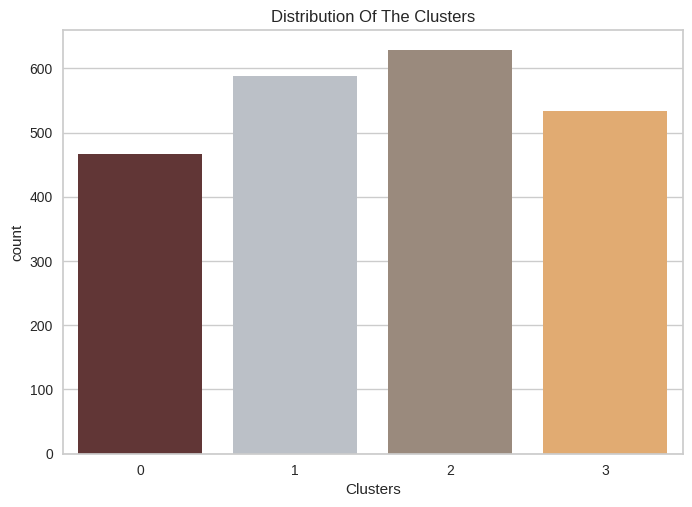

In [1558]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=PCA_data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

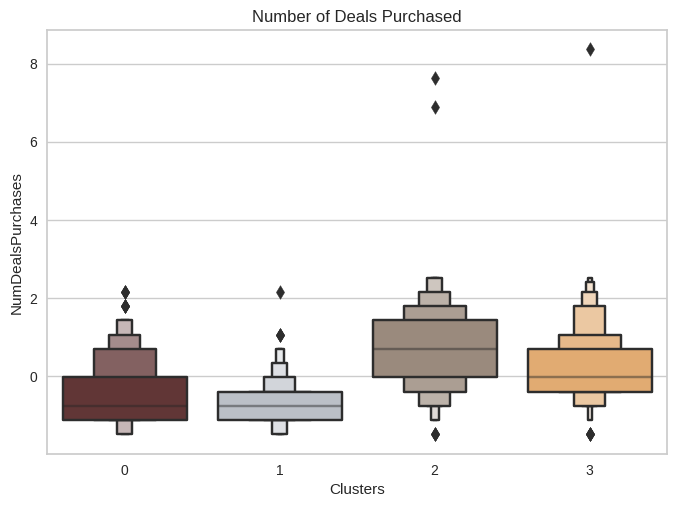

In [1559]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

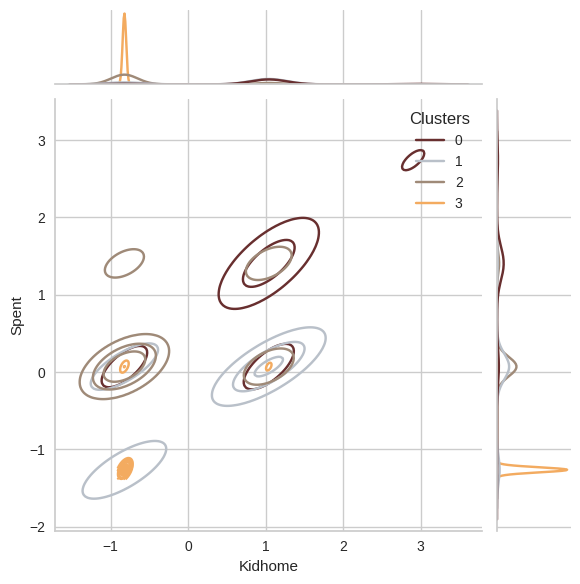

<Figure size 800x550 with 0 Axes>

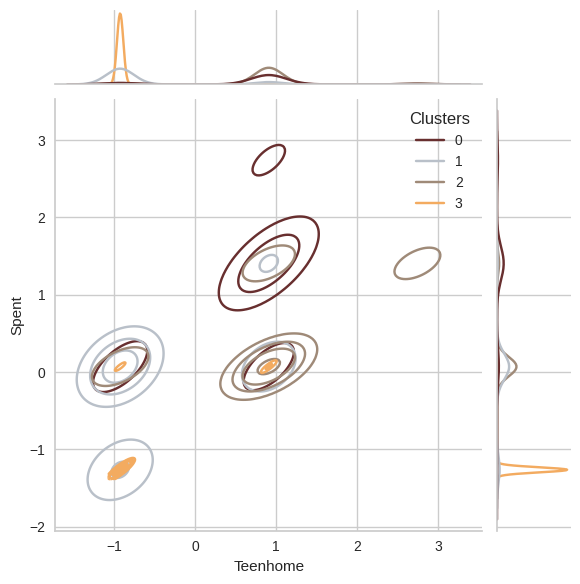

<Figure size 800x550 with 0 Axes>

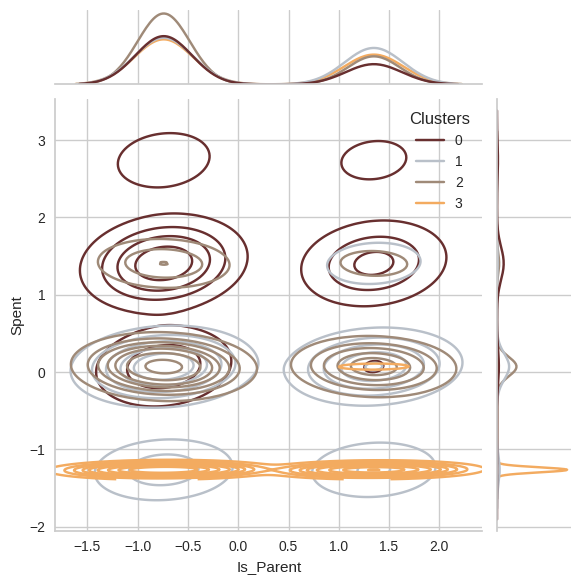

<Figure size 800x550 with 0 Axes>

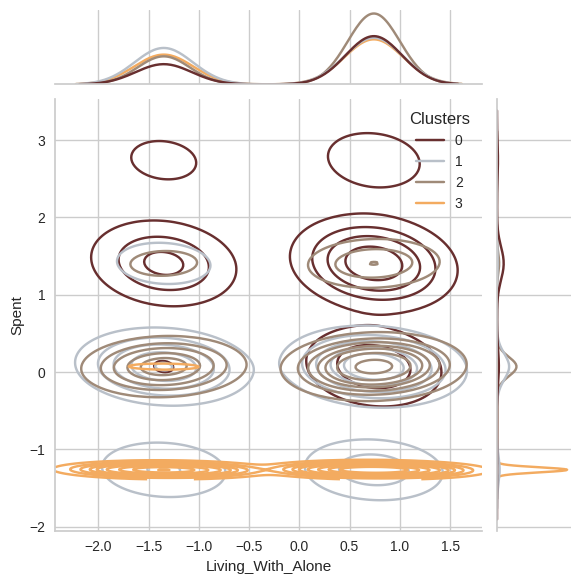

<Figure size 800x550 with 0 Axes>

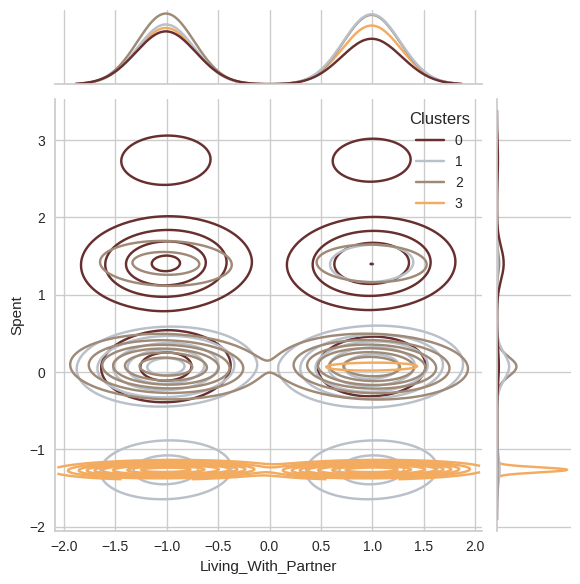

In [1562]:
Personal = [ "Kidhome","Teenhome", "Is_Parent","Living_With_Alone","Living_With_Partner"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()